# Part 1 ‑ Exploratory data analysis

## Aggregate the login counts based on 15 minute time intervals

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

df = pd.read_json('logins.json')
df['count'] = 1
df.set_index('login_time', inplace=True)
df_15min = df.resample('15T').sum()
df_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [93]:
def plot(x, y, title):
    plt.plot(x, y)
    plt.xticks(rotation = 60)
    plt.title(title)

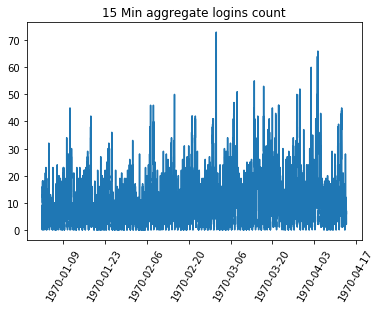

In [94]:
# Plotting the 15 min aggregate values
plot(df_15min.index, df_15min['count'], "15 Min aggregate logins count")

# We will downscale the datapoints to every hour and plot the results

                     count
login_time                
1970-01-01 20:00:00     24
1970-01-01 21:00:00      9
1970-01-01 22:00:00     21
1970-01-01 23:00:00     58
1970-01-02 00:00:00     53


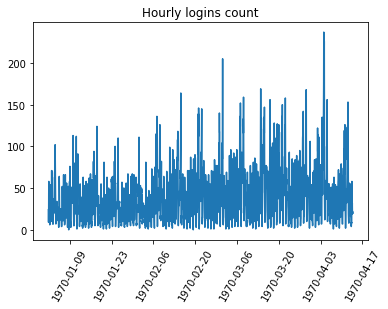

In [95]:
df_hour = df.resample('1H').sum()
print(df_hour.head())
plot(df_hour.index, df_hour['count'], "Hourly logins count")

# Datapoints aggregated to every day 

            count
login_time       
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459


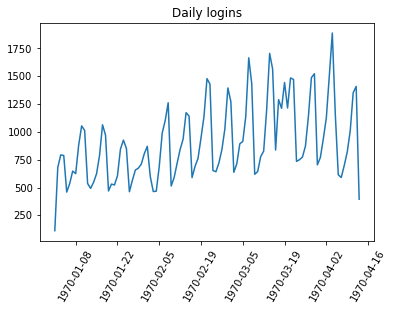

In [96]:
df_day = df.resample('1D').sum()
print(df_day.head())
plot(df_day.index, df_day['count'],"Daily logins")

# Plot showing daily logins for each month - Jan, Feb, Mar, Apr

            count
login_time       
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
1970-01-06    536


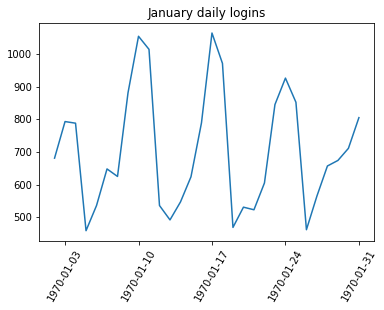

In [97]:
df_jan_daily = df_day[(df_day.index > "1970-01-01") & (df_day.index < "1970-02-01")]
print(df_jan_daily.head())
plot(df_jan_daily.index, df_jan_daily['count'],"January daily logins")

            count
login_time       
1970-02-02    599
1970-02-03    464
1970-02-04    467
1970-02-05    688
1970-02-06    990


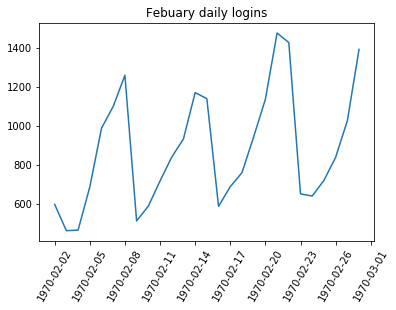

In [98]:
df_feb_daily = df_day[(df_day.index > "1970-02-01") & (df_day.index < "1970-03-01")]
print(df_feb_daily.head())
plot(df_feb_daily.index, df_feb_daily['count'],"Febuary daily logins")

            count
login_time       
1970-03-02    637
1970-03-03    714
1970-03-04    893
1970-03-05    914
1970-03-06   1140


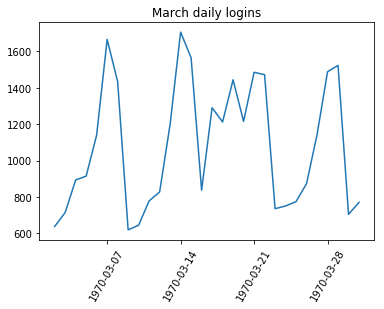

In [99]:
df_mar_daily = df_day[(df_day.index > "1970-03-01") & (df_day.index < "1970-04-01")]
print(df_mar_daily.head())
plot(df_mar_daily.index, df_mar_daily['count'],"March daily logins")

#### Based on hourly aggregate of logins, April has the most number of logins
#### logins surge during weekend and comes down beginning of the week.
#### Only deviation from that pattern is in the week of 14th March. Logins has fluctuated up and down rather than just going up during the weekend. We don't know if it's error in data or there was a genuine reason for the flucuations. Knowing the business behind the logins will give us the reason

# Part 2 ‑ Experiment and metrics design

#### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
#### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
#### a. how you will implement the experiment
#### b. what statistical test(s) you will conduct to verify the significance of the observation
#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


Key of measure would be the number of passengers serviced in both cities. The money city operations earns can also be measure of success after deducting the reimbursed toll costs.
More number of rides are provided, more money is generated.

Collect the data like distance, user, origin, destination, fare etc about the rides provided by drivers in both cities before this experiment is implemented.
Collect the same data after the experiment is implemented and do a significance test between the 2 population with a chosen alpha value to check if there is any change in the number of passengers serviced. 
H0 = There is no change in the number of trips before and after new rule.
Ha = There is change in the number of trips
If the p-value we get from t-test statistic is less than the value of alpha, then there is significant change in the number of people serviced.

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [100]:

file = open('ultimate_data_challenge.json', 'r')
df_users = pd.DataFrame(json.load(file))
file.close()

#df1 = pd.read_json("ultimate_data_challenge.json")
df_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


## 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [101]:
df_users['last_trip_date'].max()

'2014-07-01'

#### Assuming that the data was obtained the next day of the most recent day in the dataset, which is July 2nd 2014. So, the last 30 days period would be June 2nd 2014 - July 1st 2014. Users who have made trip during this period are considered active users

In [102]:
df_users['active'] = 0

In [103]:
#df.loc[df.ID == 103, 'FirstName'] = "Matt"
df_users.loc[df_users['last_trip_date'] < '2014-06-02', 'active'] = 0
df_users.loc[df_users['last_trip_date'] >= '2014-06-02', 'active'] = 1

In [104]:
df_users.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0


In [105]:
df_users['active'].value_counts()/len(df_users)

0    0.6338
1    0.3662
Name: active, dtype: float64

In [106]:
df_users['active'].value_counts()

0    31690
1    18310
Name: active, dtype: int64

#### 63.38% of the users are inactive and 36.62% of the users are active, that is they have made a trip in the last 30 days.

In [107]:
df_users.isnull().sum()
len(df_users)
df_users = df_users.dropna()
len(df_users)

41445

In [108]:
df_users['last_trip_date'] = pd.to_datetime(df_users['last_trip_date'])
df_users['signup_date']    = pd.to_datetime(df_users['signup_date'])

df_users['num_of_days_active'] = df_users['last_trip_date'] - df_users['signup_date'] 

#assign 1 if active, 0 if not active in the 6th month of their signup date
df_users['active_users_in_6thmonth'] = df_users['num_of_days_active'].apply(lambda x: int( (x >= pd.Timedelta('150 days')) & (x < pd.Timedelta('180 days')) ) )
df_users['active_users_in_6thmonth'].value_counts()

0    29815
1    11630
Name: active_users_in_6thmonth, dtype: int64

In [109]:
df_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,num_of_days_active,active_users_in_6thmonth
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,143 days,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,96 days,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,1 days,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,170 days,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,47 days,0


In [110]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 15 columns):
avg_dist                    41445 non-null float64
avg_rating_by_driver        41445 non-null float64
avg_rating_of_driver        41445 non-null float64
avg_surge                   41445 non-null float64
city                        41445 non-null object
last_trip_date              41445 non-null datetime64[ns]
phone                       41445 non-null object
signup_date                 41445 non-null datetime64[ns]
surge_pct                   41445 non-null float64
trips_in_first_30_days      41445 non-null int64
ultimate_black_user         41445 non-null bool
weekday_pct                 41445 non-null float64
active                      41445 non-null int64
num_of_days_active          41445 non-null timedelta64[ns]
active_users_in_6thmonth    41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2), timedelta64[ns](1)
memory usage: 6.0+ MB


In [111]:
df_users['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

In [112]:
df_users['phone'].value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

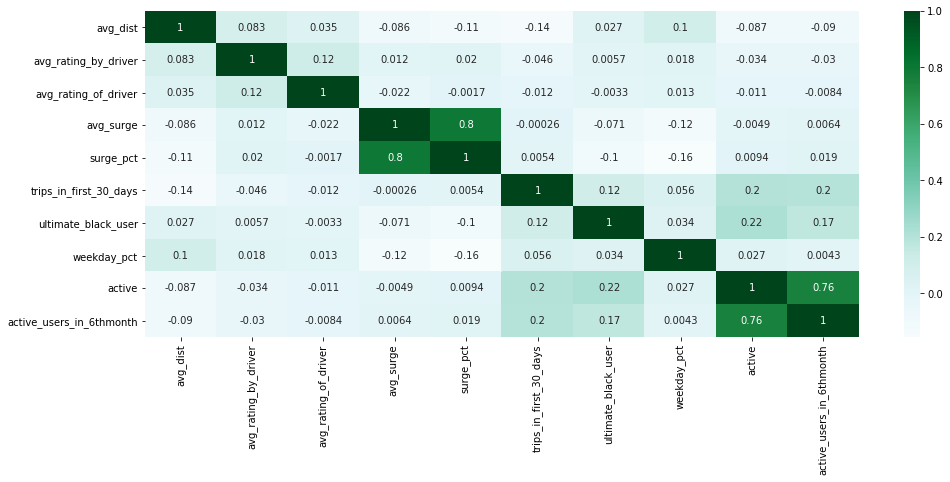

In [113]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_users.corr(), cmap='BuGn', annot=True)

#### There is positive correlation between the features trips_in_first_30_days and active users, also between weekday_pct and active users.
#### We can say many users who were ultimate black users were active in 6th month.

10273
19542


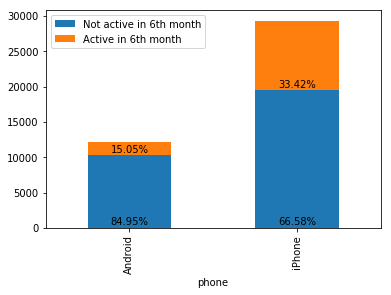

In [114]:
# phone vs active_users_in_6thmonth
df_phone = pd.crosstab(index=df_users["phone"], columns=df_users["active_users_in_6thmonth"])
ax = df_phone.plot(kind='bar', stacked=True)
for rec, label_0, label_1 in zip(ax.patches, df_phone[0], df_phone[1]):
    height = rec.get_height()
    print(height)
    ax.text(rec.get_x() + rec.get_width() / 2, 100, str(round((label_0/(label_0+label_1))*100, 2))+'%', 
           ha = 'center', va='bottom')
    ax.text(rec.get_x() + rec.get_width() / 2, height + 100, str(round((label_1/(label_0+label_1))*100, 2))+'%', 
           ha = 'center', va='bottom')

    plt.legend(loc='upper left')

L=plt.legend()
L.get_texts()[0].set_text('Not active in 6th month')
L.get_texts()[1].set_text('Active in 6th month')

#### The iphone users were more prone to be active in the 6th month of the service. Maybe, the app on iphone was more efficient in attracting the riders. 

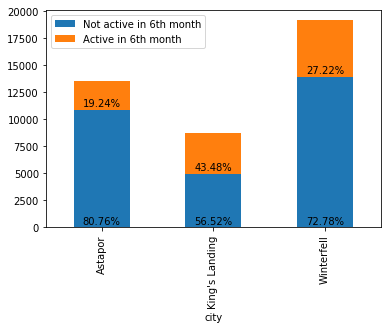

In [115]:
# city vs active_users_in_6thmonth
df_city = pd.crosstab(index=df_users["city"], columns=df_users["active_users_in_6thmonth"])
ax = df_city.plot(kind='bar', stacked=True)
#print(df_city.head(10))
for rec, label_0, label_1 in zip(ax.patches, df_city[0], df_city[1]):
    height = rec.get_height()
    #print(height)
    ax.text(rec.get_x() + rec.get_width() / 2, 100, str(round((label_0/(label_0+label_1))*100, 2))+'%', 
           ha = 'center', va='bottom')
    ax.text(rec.get_x() + rec.get_width() / 2, height + 100, str(round((label_1/(label_0+label_1))*100, 2))+'%', 
           ha = 'center', va='bottom')

    plt.legend(loc='upper left')
L=plt.legend()
L.get_texts()[0].set_text('Not active in 6th month')
L.get_texts()[1].set_text('Active in 6th month')
    

#### Users in the city of King's Landing are more active in the 6th month than the other city people. 

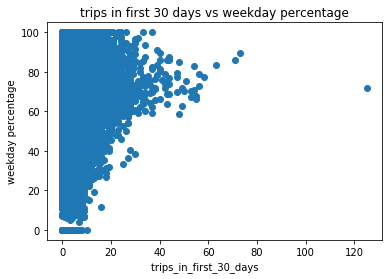

In [116]:
plt.scatter(df_users["trips_in_first_30_days"], df_users["weekday_pct"])
plt.title("trips in first 30 days vs weekday percentage")
plt.xlabel("trips_in_first_30_days      ")
plt.ylabel("weekday percentage")
plt.show()

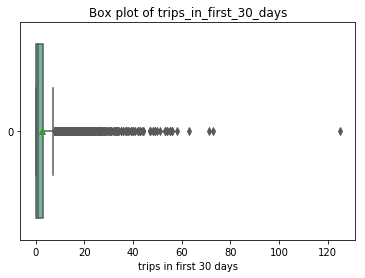

In [117]:
sns.boxplot(data=df_users['trips_in_first_30_days'], orient="h", palette="Set2", showmeans=True)
plt.title("Box plot of trips_in_first_30_days")
plt.xlabel("trips in first 30 days")
plt.show()

#### There is a user who has done 120 trips in 30 days. There are few other outliers, users who have dome 60+ trips in a month.

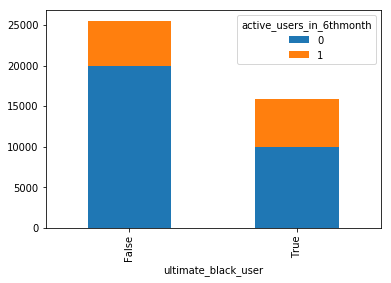

In [118]:
df_ultblk = pd.crosstab(index=df_users["ultimate_black_user"], columns=df_users["active_users_in_6thmonth"])
ax = df_ultblk.plot(kind='bar', stacked=True)

#### There is more chance of a ultimate black user being active in 6th month than a non black ultimate user.

#### This is a classification problem sincewe have to decide if a user belongs to one of the class, active or not active in the 6th month of their signup.
#### I am choosing Random forest classifier to model the data since it is good for mix of numeric and categorical data.

In [119]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 15 columns):
avg_dist                    41445 non-null float64
avg_rating_by_driver        41445 non-null float64
avg_rating_of_driver        41445 non-null float64
avg_surge                   41445 non-null float64
city                        41445 non-null object
last_trip_date              41445 non-null datetime64[ns]
phone                       41445 non-null object
signup_date                 41445 non-null datetime64[ns]
surge_pct                   41445 non-null float64
trips_in_first_30_days      41445 non-null int64
ultimate_black_user         41445 non-null bool
weekday_pct                 41445 non-null float64
active                      41445 non-null int64
num_of_days_active          41445 non-null timedelta64[ns]
active_users_in_6thmonth    41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2), timedelta64[ns](1)
memory usage: 6.0+ MB


In [120]:
X_cat = df_users.iloc[:, [4,6,10]].values #Categorical values - city, phone, ultimate black user
X_num = df_users.iloc[:, [0,1,2,3,8,9,11]].values # Numerical values

#print(X_cat) #,2,4,5,6,7,8,9
#print(X_num)
# Encode the categorical features [city, phone, ultimate black user]
labelencoder_X_0 = LabelEncoder()
X_cat[:, 0] = labelencoder_X_0.fit_transform(X_cat[:, 0]) #city
labelencoder_X_1 = LabelEncoder()
X_cat[:, 1] = labelencoder_X_1.fit_transform(X_cat[:, 1]) #phone
labelencoder_X_2 = LabelEncoder()
X_cat[:, 2] = labelencoder_X_2.fit_transform(X_cat[:, 2]) #ultimate black user


onehotencoder = OneHotEncoder(categorical_features = "all")
X_cat = onehotencoder.fit_transform(X_cat).toarray()
#print('xcat shape', X_cat.shape)


# Standardizing the numerical features
X_num = StandardScaler().fit_transform(X_num)
#print('xnum shape',X_num.shape)

#Form the X and y 
X = np.concatenate([X_cat, X_num], axis = 1)
#X = X_num
y = df_users['active_users_in_6thmonth'].values # Class

#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)



In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [122]:
# From scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ["Not active", "Active"]    
# Print Classification Report    
def print_classifn_report(y_test, y_pred, title):
    print("\nAccuracy score for test set {}\n".format(accuracy_score(y_test, y_pred)))
    print("Classification Report {}\n".format(title))
    print(classification_report(y_test, y_pred))

# Compute confusion matrix
def compute_plot_confusion_matrix(y_test, y_pred, title):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(title)
    print(cnf_matrix)
    #print(confusion_matrix(y_test, y_pred))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()    

title="\n Confusion matrix for Random Forest Classifier with default parameters\n"
compute_plot_confusion_matrix(y_test, y_pred, title)
title="For Random Forest Classifier with default parameters"
print_classifn_report(y_test, y_pred, title)



[[5239  724]
 [1354  972]]


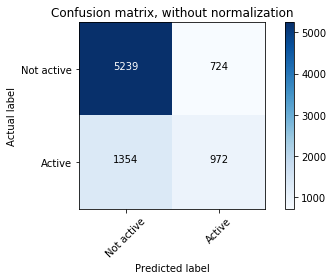

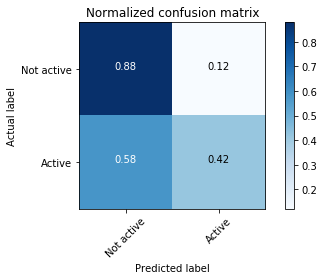

In [123]:
title="\n"
compute_plot_confusion_matrix(y_test, y_pred, title)

In [124]:
title=""
print_classifn_report(y_test, y_pred, title)


Accuracy score for test set 0.7493063095668959

Classification Report 

             precision    recall  f1-score   support

          0       0.79      0.88      0.83      5963
          1       0.57      0.42      0.48      2326

avg / total       0.73      0.75      0.74      8289



In [125]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


Area under the ROC curve : 0.761447


#### The model has the accuracy rate of 74.%, which means it is predicting true active users and non active users corectly 74.64% of the time. 
#### Area under the curve performance metric says the model is separating 76.04% of the users correctly.
#### Model can be improved by tuning the parameters which has not been done in this assignment.

#### Recommendations from above analysis 
##### Android app can be improved to attract more riders since retention rate among android users is less than iphone users. 
##### Ultimate black user privilege seems to be attracting users to ride more. Business can be improved by providing these privileges to non ultimate black users.
